In [1]:
import matplotlib.pyplot as plt
import glob
from plot import parse_experiment_result, plot_preemption_stats, plot_per_range_query_ratio

In [ ]:
diff_interval_test_result = glob.glob("../diff_workloads/*")
print(diff_interval_test_result) 
diff_interval_test_result.sort()

preemption_stats = [parse_experiment_result(file) for file in diff_interval_test_result]

result_per_range_ratio: dict[float, list] = {}
for item in preemption_stats:
    if item.range_query_ratio in result_per_range_ratio.keys():
        result_per_range_ratio[item.range_query_ratio].append(item)
    else:
        result_per_range_ratio[item.range_query_ratio] = [item] 
# print(result_per_range_ratio)

In [ ]:
for key, val in result_per_range_ratio.items():
    plot_preemption_stats(val, key="latency_99pc_us")

In [ ]:
diff_preemption_slice = glob.glob("../diff_preemption_results/*")
print(diff_preemption_slice) 
diff_preemption_slice.sort()

preemption_stats = [parse_experiment_result(file) for file in diff_preemption_slice]

diff_preemption_per_range_ratio: dict[float, list] = {}
for item in preemption_stats:
    if item.range_query_ratio in diff_preemption_per_range_ratio.keys():
        # if item.preemption_interval_us == None or item.preemption_interval_us % 10 == 0:
        diff_preemption_per_range_ratio[item.range_query_ratio].append(item)
    else:
        diff_preemption_per_range_ratio[item.range_query_ratio] = [item] 
# print(diff_preemption_per_range_ratio)

for key, val in diff_preemption_per_range_ratio.items():
    print(key, ":")
    for item in val: 
        print(item.scheduler, item.preemption_interval_us)

In [ ]:
for key, val in diff_preemption_per_range_ratio.items():
    plot_preemption_stats(val, key="latency_99pc_us") # latency_99pc_us latency_99_9pc_us

In [ ]:
diff_wkld_slice = glob.glob("../diff_wkld_slice/*")
print(diff_wkld_slice) 
diff_wkld_slice.sort()

diff_wkld_slice_res = [parse_experiment_result(file) for file in diff_wkld_slice]

diff_wkld_dict: dict[float, list] = {}
for item in diff_wkld_slice_res:
    if item.range_query_ratio in diff_wkld_dict.keys():
        # if item.preemption_interval_us == None or item.preemption_interval_us % 10 == 0:
        diff_wkld_dict[item.range_query_ratio].append(item)
    else:
        diff_wkld_dict[item.range_query_ratio] = [item] 
# print(diff_preemption_per_range_ratio)

for key, val in diff_wkld_dict.items():
    print(key, ":")
    for item in val: 
        print(item.scheduler, item.preemption_interval_us)

In [ ]:
for key, val in diff_wkld_dict.items():
    plot_preemption_stats(val, key="latency_99pc_us") # latency_99pc_us latency_99_9pc_us

In [ ]:
diff_wkld = glob.glob("../diff_wkld/*")
diff_wkld.sort()

diff_wkld_res = [parse_experiment_result(file) for file in diff_wkld]

ghost = []
cfs = []

for item in diff_wkld_res:
    if item.scheduler == "CFS":
        cfs.append(item)
    else :
        ghost.append(item)


# for item in diff_wkld_res:
plot_preemption_stats(cfs, key="latency_99pc_us", label_format = "ratio")
plot_preemption_stats(ghost, key="latency_99pc_us", label_format = "ratio")

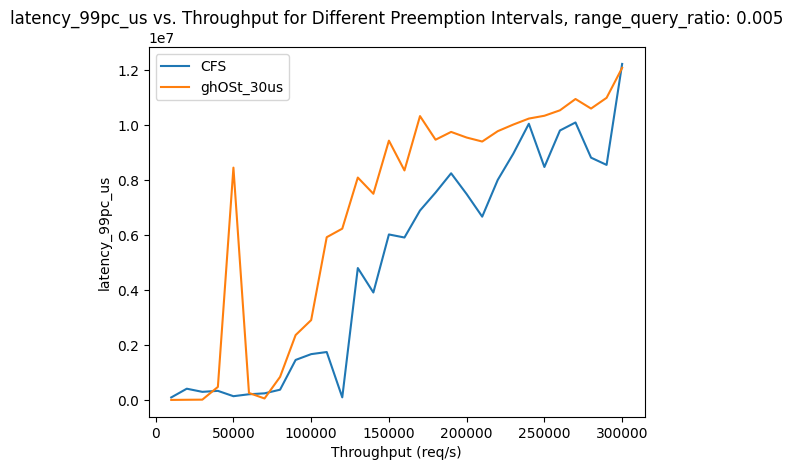

In [4]:
diff_duration = glob.glob("../diff_duration/*")
diff_duration.sort()

diff_duration_res = [parse_experiment_result(file) for file in diff_duration]
plot_preemption_stats(diff_duration_res, key="latency_99pc_us")


[Experiment(scheduler='CFS', preemption_interval_us=None, range_query_ratio=0.005, exp_stats=[ExperimentStats(throughput=10000, get_stats=RocksDBOpStats(ingress_queue_time=StatsVector(total_requests=129259, throughput_req_per_sec=9945, latency_min_us=0, latency_50pc_us=0, latency_99pc_us=37438, latency_99_5pc_us=46955, latency_99_9pc_us=56425, latency_max_us=63035), repeatable_handle_time=StatsVector(total_requests=129259, throughput_req_per_sec=9945, latency_min_us=0, latency_50pc_us=0, latency_99pc_us=12063, latency_99_5pc_us=16022, latency_99_9pc_us=16114, latency_max_us=31862), worker_queue_time=StatsVector(total_requests=129259, throughput_req_per_sec=9945, latency_min_us=0, latency_50pc_us=0, latency_99pc_us=1, latency_99_5pc_us=15, latency_99_9pc_us=15801, latency_max_us=31965), worker_handle_time=StatsVector(total_requests=129259, throughput_req_per_sec=9945, latency_min_us=4, latency_50pc_us=5, latency_99pc_us=11, latency_99_5pc_us=12, latency_99_9pc_us=18, latency_max_us=2003

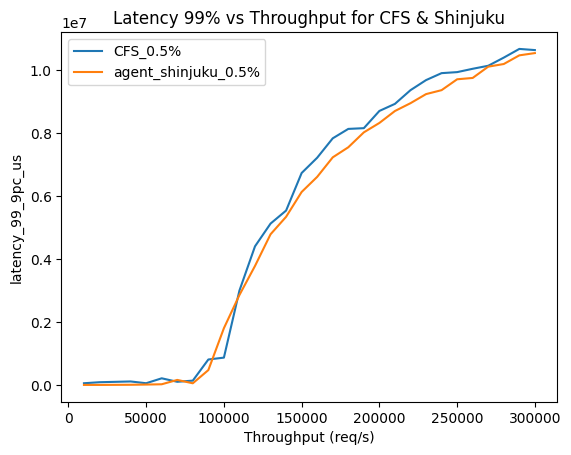

In [2]:
diff_wkld = glob.glob("../ghost/*")
diff_wkld.sort()

diff_wkld_res = [parse_experiment_result(file) for file in diff_wkld]

# ghost = []
# cfs = []

# for item in diff_wkld_res:
#     if item.scheduler == "CFS":
#         cfs.append(item)
#     else :
#         ghost.append(item)


# for item in diff_wkld_res:
print(diff_wkld_res)
plot_preemption_stats(diff_wkld_res, key="latency_99_9pc_us", label_format = "ratio", title = "Latency 99% vs Throughput for CFS & Shinjuku")
# plot_preemption_stats(ghost, key="latency_99pc_us", label_format = "ratio")